   Customer ID  Merchant ID  Transaction Amount Transaction Date  \
0         9789          120          127.960100       2010-06-17   
1         6038          319           20.135633       2015-06-14   
2         7737          872           41.157154       2012-04-13   
3         4626          408           75.157803       2011-12-31   
4         1490          800           28.554275       2010-06-24   

  Transaction Category Transaction Type  
0             Clothing             Cash  
1               Travel           Credit  
2                 Food            Debit  
3          Electronics             Cash  
4             Clothing             Cash  
          Customer ID     Merchant ID  Transaction Amount
count  1000000.000000  1000000.000000      1000000.000000
mean      4993.725294      500.384118           33.124891
std       2884.962172      288.821277           43.086162
min          1.000000        1.000000            0.104045
25%       2497.000000      250.000000           1

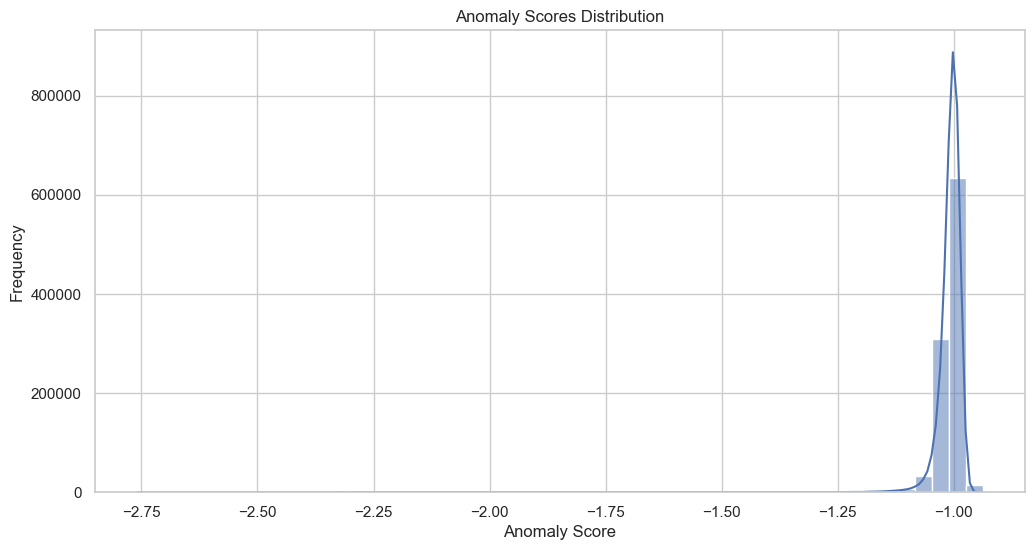

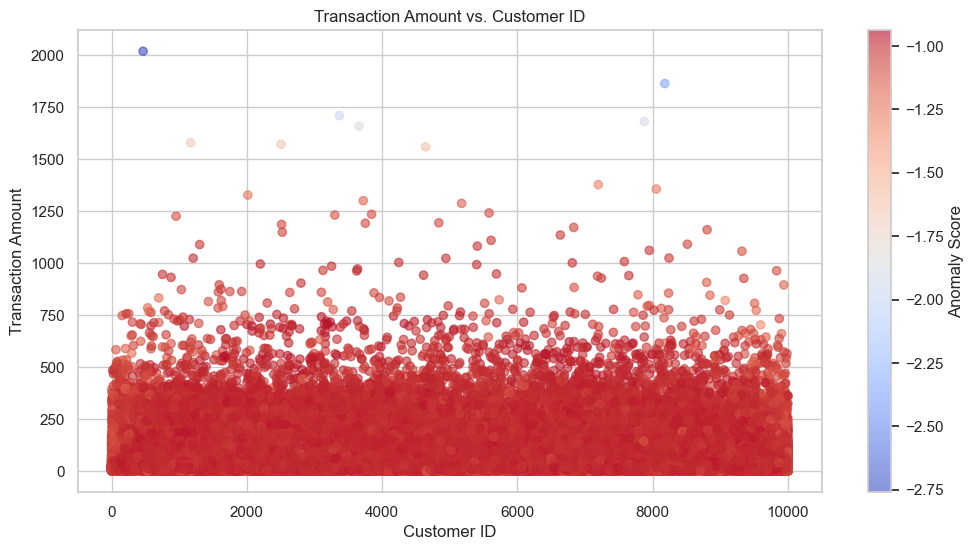

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

def generate_synthetic_transactions(n_transactions=1000000, n_customers=10000, n_merchants=1000):
    """
    Generate synthetic transaction data

    Parameters:
    - n_transactions (int): Number of transactions to generate
    - n_customers (int): Number of unique customers
    - n_merchants (int): Number of unique merchants

    Returns:
    - transactions (pd.DataFrame): Synthetic transaction data
    """
    # Generate customer IDs
    customer_ids = np.random.randint(1, n_customers + 1, size=n_transactions)

    # Generate merchant IDs
    merchant_ids = np.random.randint(1, n_merchants + 1, size=n_transactions)

    # Generate transaction amounts
    transaction_amounts = np.random.lognormal(mean=3, sigma=1, size=n_transactions)

    # Generate transaction dates
    start_date = pd.to_datetime('2010-01-01')
    end_date = pd.to_datetime('2020-12-31')
    transaction_dates = np.random.choice(pd.date_range(start_date, end_date), size=n_transactions)

    # Generate transaction categories
    transaction_categories = np.random.choice(['Food', 'Electronics', 'Clothing', 'Travel'], size=n_transactions)

    # Generate transaction types
    transaction_types = np.random.choice(['Credit', 'Debit', 'Cash'], size=n_transactions)

    # Create the transaction dataset
    transactions = pd.DataFrame({
        'Customer ID': customer_ids,
        'Merchant ID': merchant_ids,
        'Transaction Amount': transaction_amounts,
        'Transaction Date': transaction_dates,
        'Transaction Category': transaction_categories,
        'Transaction Type': transaction_types
    })

    return transactions

# Generate the synthetic transactions
transactions = generate_synthetic_transactions(n_transactions=1000000, n_customers=10000, n_merchants=1000)
transactions.to_csv('transactions.csv', index=False)

# Load the transaction data (1,000,000 rows)
transactions = pd.read_csv('transactions.csv')

# Explore the data
print(transactions.head())
print(transactions.describe())

# Select only the numeric columns for scaling
numeric_columns = ['Customer ID', 'Merchant ID', 'Transaction Amount']

# Scale the data using StandardScaler
scaler = StandardScaler()
transactions_scaled = scaler.fit_transform(transactions[numeric_columns])

# Create an instance of LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the scaled data
lof.fit(transactions_scaled)

# Predict anomalies (outliers)
anomaly_scores = lof.negative_outlier_factor_

# Add the anomaly scores to the transactions dataframe
transactions['Anomaly Score'] = anomaly_scores

# Enhanced Visualization
sns.set(style="whitegrid")

# 1. Histogram of anomaly scores with KDE
plt.figure(figsize=(12, 6))
sns.histplot(anomaly_scores, bins=50, kde=True, color='b')
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of transaction amount vs. customer ID colored by anomaly scores
plt.figure(figsize=(12, 6))
scatter = plt.scatter(transactions['Customer ID'], transactions['Transaction Amount'], 
                      c=transactions['Anomaly Score'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Anomaly Score')
plt.title('Transaction Amount vs. Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Amount')
plt.show()

# 3. Pair plot to visualize relationships between numeric features colored by anomaly scores
sns.pairplot(transactions, vars=numeric_columns, hue='Anomaly Score', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()
